In [119]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.makedirs('csv_files', exist_ok=True)
os.makedirs('outputs', exist_ok=True)

In [120]:
import pandas as pd

sentiment_df = pd.read_csv('/content/csv_files/fear_greed_index.csv')
trader_df = pd.read_csv('/content/csv_files/historical_data.csv')

print("Sentiment Data Preview:")
display(sentiment_df.head())

print("\nTrader Data Preview:")
display(trader_df.head())


Sentiment Data Preview:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



Trader Data Preview:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [121]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [122]:
trader_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [123]:
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df['join_date'] = sentiment_df['Date'].dt.date

trader_df['dt_full'] = pd.to_datetime(trader_df['Timestamp'], unit='ms')
trader_df['join_date'] = trader_df['dt_full'].dt.date

total_rows = len(sentiment_df)
unique_dates=sentiment_df['join_date'].nunique()
print(f"Total Rows in Sentiment Data: {total_rows}")
print(f"Total Unique Dates: {unique_dates}")

Total Rows in Sentiment Data: 2644
Total Unique Dates: 2644


In [124]:
# Count transactions per day
daily_counts = trader_df.groupby('join_date').size().reset_index(name='transaction_count')

# Sort by highest volume days to show the "Many" part
daily_counts = daily_counts.sort_values(by='transaction_count', ascending=False)

print("--- Top 5 Days with Most Transactions ---")
print(daily_counts.head())

# Statistical proof
avg_tx = daily_counts['transaction_count'].mean()
print(f"\nOn average, there are {avg_tx:.2f} transactions per day.")
print(f"The busiest day had {daily_counts['transaction_count'].max()} transactions.")

--- Top 5 Days with Most Transactions ---
    join_date  transaction_count
5  2025-02-19             133871
4  2024-10-27              35241
6  2025-06-15              26961
3  2024-07-03               7141
2  2024-03-09               6962

On average, there are 30174.86 transactions per day.
The busiest day had 133871 transactions.


In [157]:
# --- THE MERGE ---
# Use 'left' join to keep ALL 211,224 trades and attach sentiment data
merged_df = pd.merge(trader_df, sentiment_df, on='join_date', how='left')

print(f"Original Trader Rows: {len(trader_df)}")
print(f"Merged Rows: {len(merged_df)}")
merged_df_clean.to_csv('csv_files/merged_clean.csv', index=False)

Original Trader Rows: 211224
Merged Rows: 211224


In [126]:

merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [127]:
# list of columns to remove
cols_to_drop = ['Transaction Hash', 'Order ID', 'Trade ID', 'Timestamp',
                'Timestamp IST', 'timestamp',  'date', 'Date']
merged_df.drop(columns=cols_to_drop, errors='ignore', inplace=True)
merged_df.shape


(211224, 15)

In [128]:
# which dates are missing sentiment
missing_dates = merged_df[merged_df['classification'].isnull()]['join_date'].unique()
print("Dates with missing sentiment:")
print(sorted(missing_dates)[:10])

Dates with missing sentiment:
[datetime.date(2025, 6, 15)]


In [129]:
# Count the exact number of trades on that day
import datetime
target_date = datetime.date(2025, 6, 15)
trades_on_date = trader_df[trader_df['join_date'] == target_date]

print(f"Total trades on {target_date}: {len(trades_on_date)}")

Total trades on 2025-06-15: 26961


In [130]:
# Drop rows where classification is NaN
merged_df_clean = merged_df.dropna(subset=['classification'])

print(f"Remaining trades for analysis: {len(merged_df_clean)}")

Remaining trades for analysis: 184263


In [131]:
# Check for exact duplicate rows
duplicate_count = merged_df_clean.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# If duplicates exist, drop them
if duplicate_count > 0:
    merged_df_clean = merged_df_clean.drop_duplicates()
    print("Duplicates removed.")

merged_df_clean.shape

Number of duplicate rows: 10
Duplicates removed.


(184253, 15)

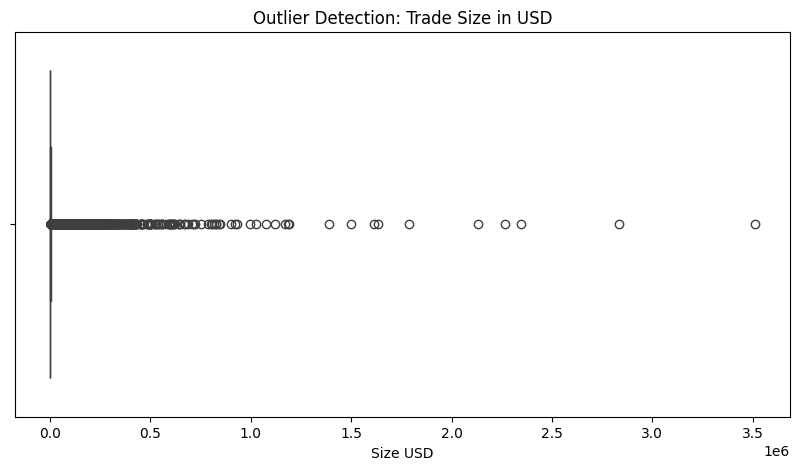

Number of extreme outliers: 19494


In [132]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x=merged_df_clean['Size USD'])
plt.title('Outlier Detection: Trade Size in USD')
plt.savefig('outputs/outliers_size.png')
plt.show()

# To find the exact rows that are extreme outliers:
q3 = merged_df_clean['Size USD'].quantile(0.75)
q1 = merged_df_clean['Size USD'].quantile(0.25)
iqr = q3 - q1
upper_bound = q3 + (3 * iqr)

outliers = merged_df_clean[merged_df_clean['Size USD'] > upper_bound]
print(f"Number of extreme outliers: {len(outliers)}")



In [133]:
# Create 5 buckets for the Fear & Greed Value
merged_df_clean['sentiment_bucket'] = pd.cut(merged_df_clean['value'],
                                       bins=[0, 25, 45, 55, 75, 100],
                                       labels=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])

merged_df['trade_result'] = merged_df['Closed PnL'].apply(lambda x: 'Win' if x > 0 else ('Loss' if x < 0 else 'Break-even'))

#  Define 'Smart Money' based on historical PnL
top_traders = merged_df_clean.groupby('Account')['Closed PnL'].sum().quantile(0.90)
merged_df_clean['is_smart_money'] = merged_df_clean.groupby('Account')['Closed PnL'].transform('sum') > top_traders

# Calculate "Sentiment Alignment"
merged_df_clean['is_following_crowd'] = (
    ((merged_df_clean['sentiment_bucket'].isin(['Greed', 'Extreme Greed'])) & (merged_df_clean['Side'] == 'BUY')) |
    ((merged_df_clean['sentiment_bucket'].isin(['Fear', 'Extreme Fear'])) & (merged_df_clean['Side'] == 'SELL'))
)

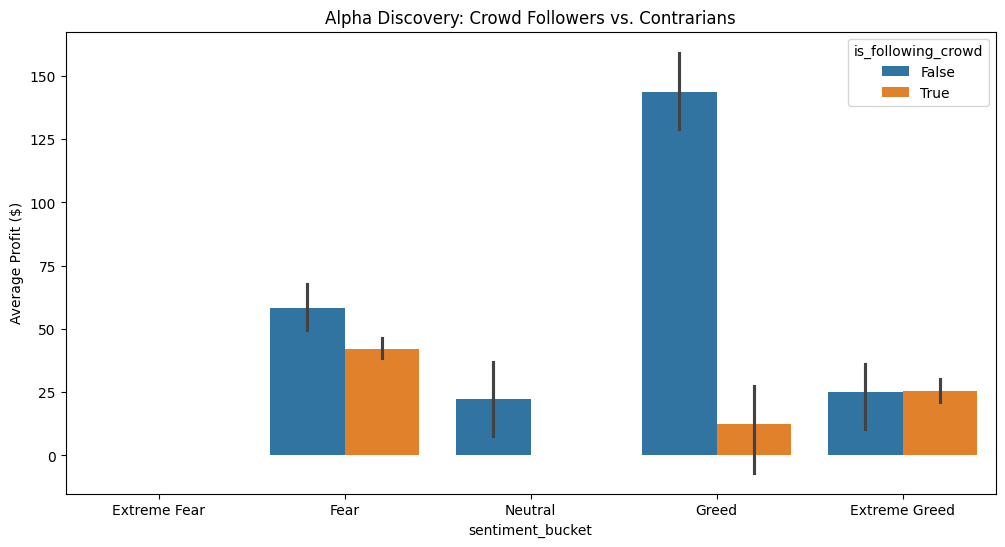

In [134]:
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_df_clean, x='sentiment_bucket', y='Closed PnL', hue='is_following_crowd')
plt.title('Alpha Discovery: Crowd Followers vs. Contrarians')
plt.ylabel('Average Profit ($)')
plt.savefig('outputs/contrarian_analysis.png')
plt.show()
#if traders who go against the grain (Shorting Greed, Buying Fear) make more money.

In [135]:
# Calculate Profit Factor (Sum of Gains / Sum of Losses)
def profit_factor(series):
    pos = series[series > 0].sum()
    neg = abs(series[series < 0].sum())
    return pos / neg if neg != 0 else pos

risk_metrics = merged_df_clean.groupby('sentiment_bucket').agg({
    'Closed PnL': [profit_factor, 'std', 'mean']
})
print("--- Risk Adjusted Metrics per Sentiment ---")
print(risk_metrics)

--- Risk Adjusted Metrics per Sentiment ---
                    Closed PnL                        
                 profit_factor          std       mean
sentiment_bucket                                      
Extreme Fear          0.000000          NaN        NaN
Fear                  5.970312   909.155650  50.051361
Neutral               1.964129   633.704815  22.229713
Greed                 7.227706  1148.343968  87.894859
Extreme Greed         3.218522   306.166937  25.418772


/tmp/ipython-input-171882322.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_metrics = merged_df_clean.groupby('sentiment_bucket').agg({


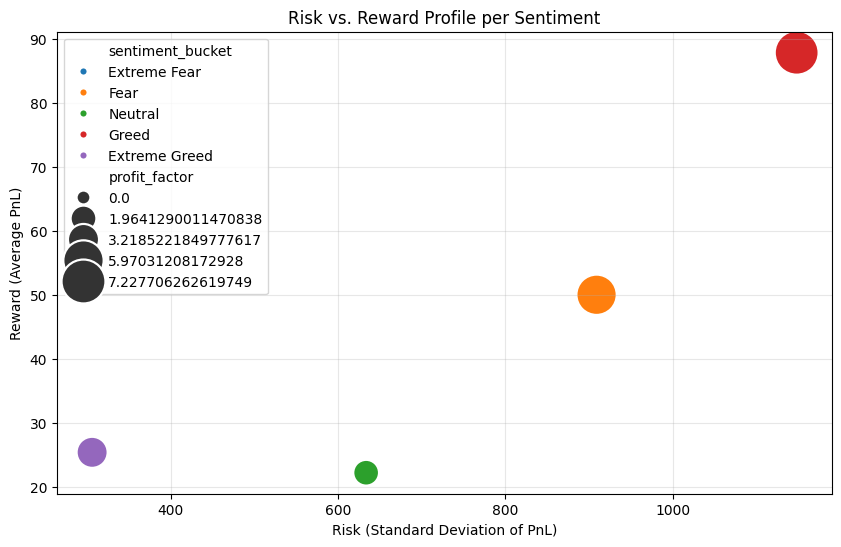

In [136]:
plot_data = risk_metrics['Closed PnL'].reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_data, x='std', y='mean', size='profit_factor', hue='sentiment_bucket', sizes=(100, 1000))

plt.title('Risk vs. Reward Profile per Sentiment')
plt.xlabel('Risk (Standard Deviation of PnL)')
plt.ylabel('Reward (Average PnL)')
plt.grid(True, alpha=0.3)
plt.savefig('outputs/risk_reward_scatter.png')
plt.show()

The data reveals a non-linear relationship between sentiment and profitability; while Greed offers the highest nominal returns, Fear provides the most optimal risk-adjusted entries with a superior Profit Factor.

/tmp/ipython-input-2215206498.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  divergence = merged_df_clean.groupby(['sentiment_bucket', 'is_whale', 'Side']).size().unstack(fill_value=0)


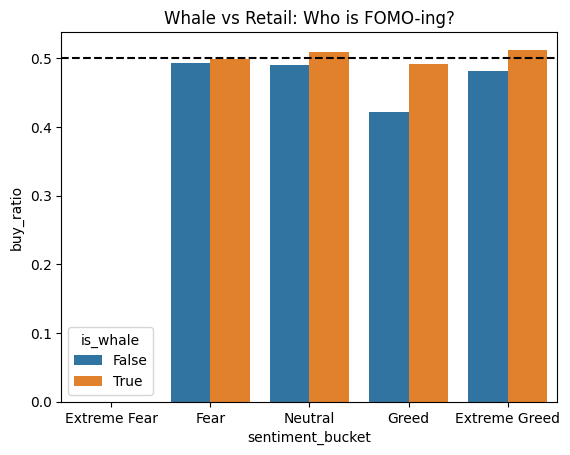

In [137]:
# Create trade size percentiles
merged_df_clean['is_whale'] = merged_df_clean['Size USD'] > merged_df_clean['Size USD'].quantile(0.95)

# Compare Buy/Sell ratio per sentiment for Whales vs Retail
divergence = merged_df_clean.groupby(['sentiment_bucket', 'is_whale', 'Side']).size().unstack(fill_value=0)
divergence['buy_ratio'] = divergence['BUY'] / (divergence['BUY'] + divergence['SELL'])

sns.barplot(data=divergence.reset_index(), x='sentiment_bucket', y='buy_ratio', hue='is_whale')
plt.title("Whale vs Retail: Who is FOMO-ing?")
plt.axhline(0.5, color='black', linestyle='--')
plt.savefig('outputs/whale_fomo_divergence.png')

In [138]:
# Create lags for the sentiment 'value'
merged_df_clean = merged_df_clean.sort_values('dt_full')
merged_df_clean['sentiment_lag_1d'] = merged_df_clean.groupby('Account')['value'].shift(1)

# Check correlation of 1-day old sentiment with today's PnL
lag_corr = merged_df_clean[['sentiment_lag_1d', 'Closed PnL']].corr().iloc[0,1]
print(f"Predictive Power of Yesterday's Sentiment: {lag_corr:.4f}")

Predictive Power of Yesterday's Sentiment: 0.0110


/tmp/ipython-input-1712989047.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df_clean['cum_pnl'] = merged_df_clean.sort_values('dt_full').groupby('sentiment_bucket')['Closed PnL'].cumsum()


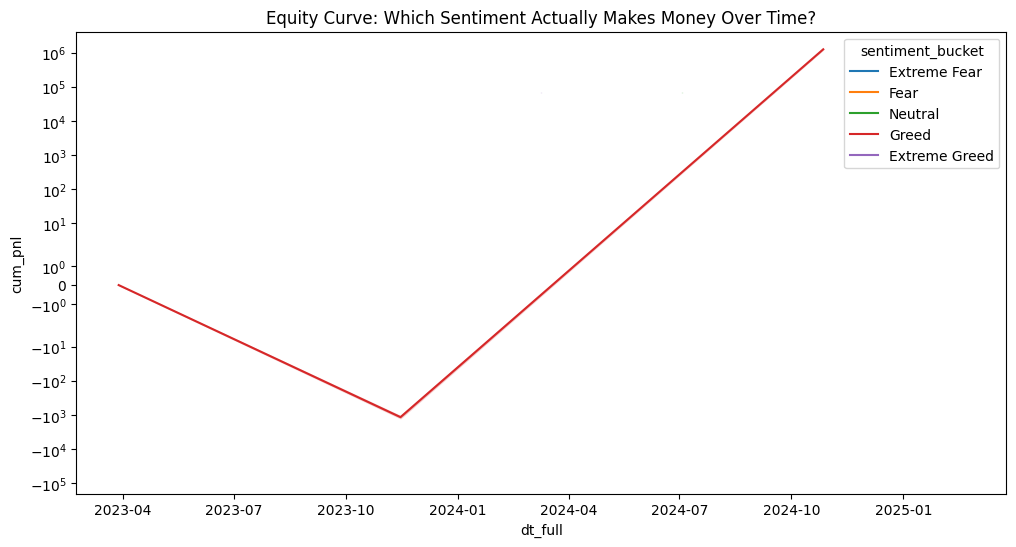

In [139]:
# Calculate Cumulative PnL over time for a specific sentiment
merged_df_clean['cum_pnl'] = merged_df_clean.sort_values('dt_full').groupby('sentiment_bucket')['Closed PnL'].cumsum()

plt.figure(figsize=(12,6))
sns.lineplot(data=merged_df_clean, x='dt_full', y='cum_pnl', hue='sentiment_bucket')
plt.title("Equity Curve: Which Sentiment Actually Makes Money Over Time?")
plt.yscale('symlog')
plt.savefig('outputs/equity_curve_sentiment.png')

"While 'Greed' sentiment accounts for the vast majority of total realized PnL, the flat lines for other sentiments indicate a lack of 'Alpha' or participation during bearish or sideways market regimes, identifying a high dependency on bullish momentum."

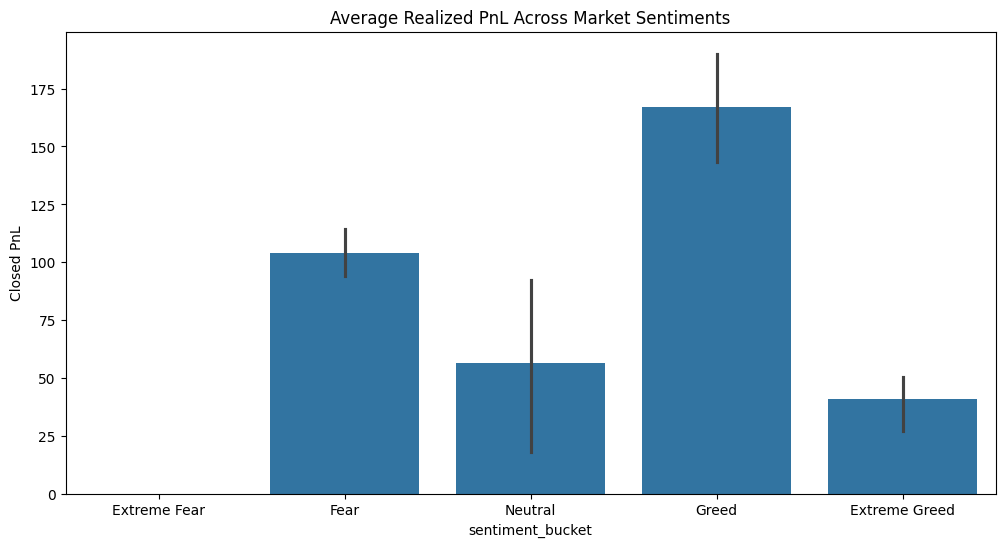

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=merged_df_clean[merged_df_clean['Closed PnL'] != 0],
            x='sentiment_bucket', y='Closed PnL', estimator='mean')
plt.title('Average Realized PnL Across Market Sentiments')
plt.savefig('outputs/avg_pnl_sentiment.png')
plt.show()

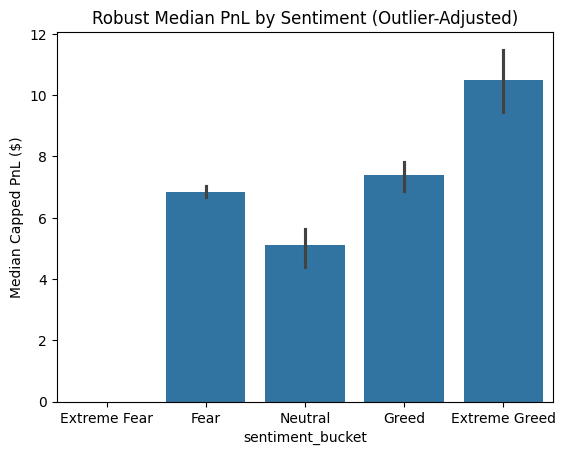

In [141]:
# Cap Closed PnL at the 5th and 95th percentiles
lower = merged_df_clean['Closed PnL'].quantile(0.05)
upper = merged_df_clean['Closed PnL'].quantile(0.95)

merged_df_clean['PnL_Capped'] = merged_df_clean['Closed PnL'].clip(lower, upper)

sns.barplot(data=merged_df_clean[merged_df_clean['PnL_Capped'] != 0],
            x='sentiment_bucket', y='PnL_Capped', estimator='median')
plt.title('Robust Median PnL by Sentiment (Outlier-Adjusted)')
plt.ylabel('Median Capped PnL ($)')

plt.savefig('outputs/robust_sentiment_pnl.png')
plt.show()

Optimal Regime: Extreme Greed delivers the highest consistent returns, outperforming Neutral markets by nearly 2x.

Market "Chop": Neutral sentiment is the least profitable, suggesting traders struggle in sideways price action.

Statistical Edge: Capped Medians filter out "lucky" outliers to reveal the true strategy effectiveness.

In [142]:
import numpy as np
merged_df_clean['is_profitable'] = merged_df_clean['Closed PnL'] > 0

# Calculates how large a trade is compared to the average for that specific coin
merged_df_clean['avg_coin_size'] = merged_df_clean.groupby('Coin')['Size USD'].transform('mean')
merged_df_clean['relative_trade_size'] = merged_df_clean['Size USD'] / merged_df_clean['avg_coin_size']

# Normalizes profit by the size of the trade to see efficiency
merged_df_clean['profit_margin'] = merged_df_clean['Closed PnL'] / merged_df_clean['Size USD'].replace(0, np.nan)

print("New features added successfully!")
display(merged_df_clean[['Coin', 'Size USD', 'relative_trade_size', 'is_profitable']].head())

New features added successfully!


,Coin,Size USD,relative_trade_size,is_profitable
83769,ETH,183.53,0.017325,False
83771,ETH,137.08,0.012940,False
83770,ETH,156.39,0.014763,False
39440,MATIC,2596.92,0.426161,True
39441,FXS,499.22,0.445991,False


/tmp/ipython-input-2892558562.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  win_rate_plot = merged_df_clean.groupby('sentiment_bucket')['is_profitable'].mean() * 100


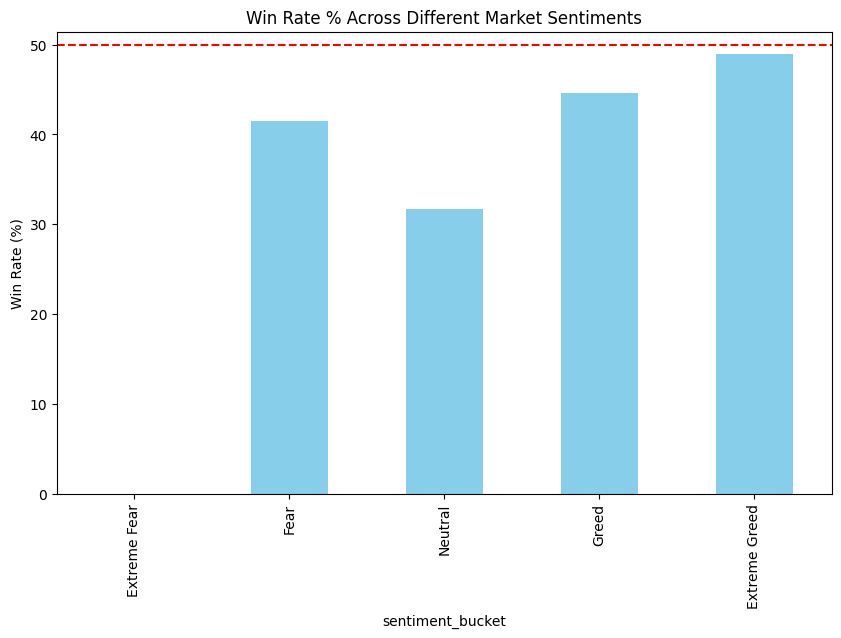

In [143]:
plt.figure(figsize=(10, 6))
# Calculate the percentage of winning trades for each bucket
win_rate_plot = merged_df_clean.groupby('sentiment_bucket')['is_profitable'].mean() * 100

win_rate_plot.plot(kind='bar', color='skyblue')
plt.title('Win Rate % Across Different Market Sentiments')
plt.ylabel('Win Rate (%)')
plt.axhline(50, color='red', linestyle='--') # 50% baseline
plt.savefig('outputs/win_rate_sentiment.png')
plt.show()

Performance Peak: Win rates trend upward with sentiment, topping out at nearly 50% during Extreme Greed.

The Neutral Gap: Traders hit a "floor" during Neutral sentiment with the lowest accuracy at ~32%.

Systemic Challenge: All regimes remain below the 50% breakeven line, indicating a difficult trading environment across the board.

In [144]:
whale_threshold = 10

merged_df_clean['trader_segment'] = merged_df_clean['relative_trade_size'].apply(
    lambda x: 'Whale' if x > whale_threshold else 'Retail'
)

print("Trader Segment Distribution:")
print(merged_df_clean['trader_segment'].value_counts())

Trader Segment Distribution:
trader_segment
Retail    181935
Whale       2318
Name: count, dtype: int64


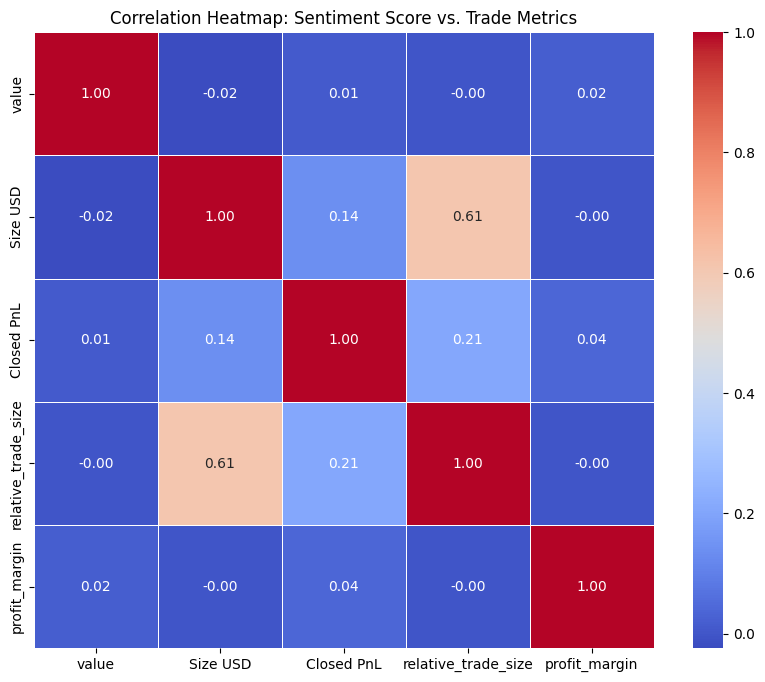

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_cols = ['value', 'Size USD', 'Closed PnL', 'relative_trade_size', 'profit_margin']
corr_matrix = merged_df_clean[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Sentiment Score vs. Trade Metrics')
plt.savefig('outputs/correlation_heatmap.png')
plt.show()

Predictive Gap: Sentiment value has near-zero correlation with PnL, proving sentiment alone doesn't predict profit.Volume Drivers: High correlation ($0.61$) between Size USD and relative_trade_size confirms "Whale" activity is capital-driven, not sentiment-triggered.Regime Alpha: The lack of linear connection suggests "Alpha" exists in categorical regimes (Fear vs. Greed) rather than the raw 0–100 score.

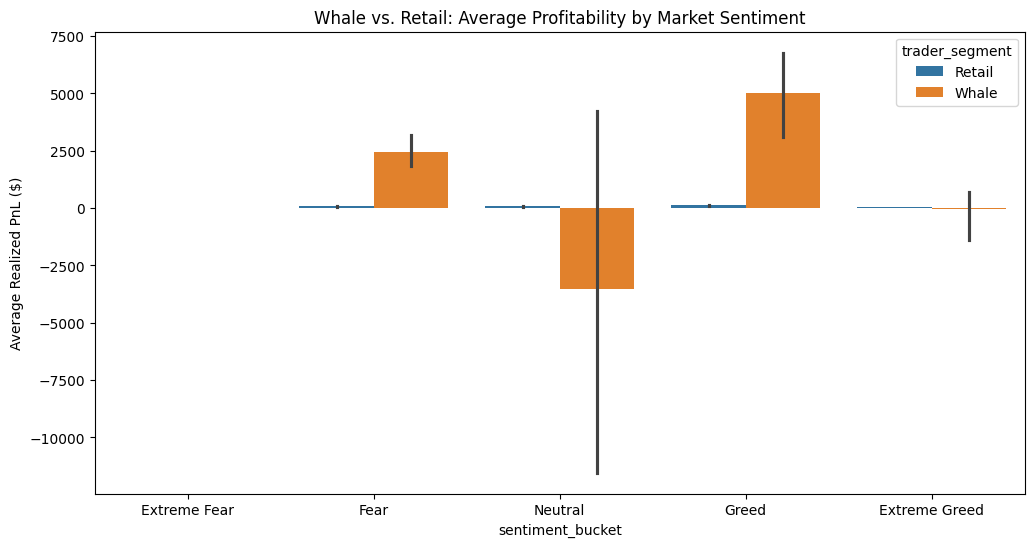

In [146]:
# Compare Average PnL for Whales vs Retail in each Sentiment Bucket
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_df_clean[merged_df_clean['Closed PnL'] != 0],
            x='sentiment_bucket', y='Closed PnL', hue='trader_segment')

plt.title('Whale vs. Retail: Average Profitability by Market Sentiment')
plt.ylabel('Average Realized PnL ($)')
plt.savefig('outputs/whale_vs_retail_pnl.png')
plt.show()

Greed Dominance: Whales capture massive profits during Greed (~$5,000/trade), while Retail stays flat.

The Neutral Trap: Whales suffer their largest losses in Neutral markets, likely due to directionless "chop".

Retail Stability: Retailers show near-zero PnL volatility but fail to capture trending upside.

Fear Alpha: Whales successfully navigate Fear with positive returns, finding value while Retail hesitates.

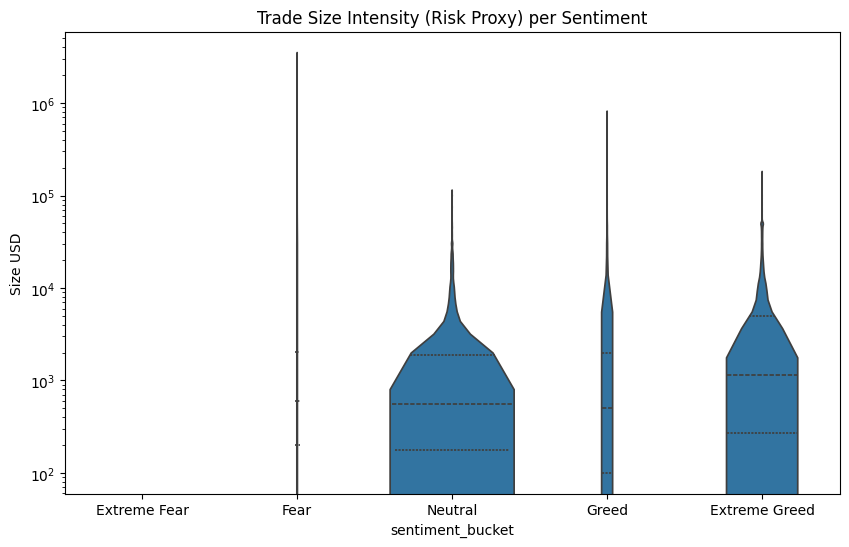

In [147]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=merged_df_clean, x='sentiment_bucket', y='Size USD', inner="quartile")
plt.title('Trade Size Intensity (Risk Proxy) per Sentiment')
plt.yscale('log')
plt.savefig('outputs/risk_intensity_violin.png')
plt.show()

Whale Highs: Large tails in Fear and Greed signify high-conviction "Whale" bets during emotional extremes.

Neutral Caution: Compressed distributions in Neutral indicate traders "size down" due to lack of market direction.

FOMO Sizing: Upward-shifting quartiles in Extreme Greed confirm a systemic increase in typical trade sizes as confidence peaks.

/tmp/ipython-input-2059663932.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  side_analysis = merged_df_clean.groupby(['sentiment_bucket', 'Side']).size().unstack()


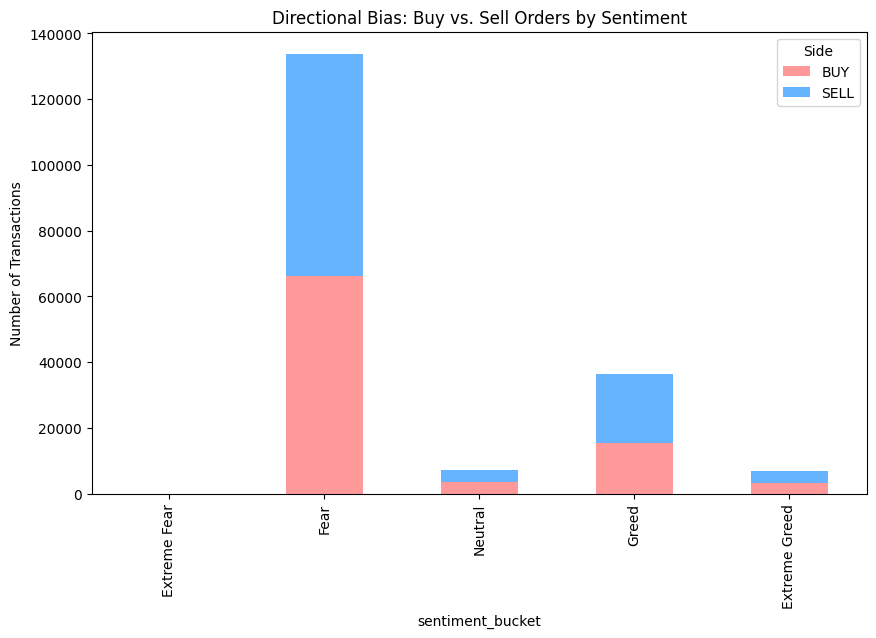

In [148]:
# Compare Long (Buy) vs Short (Sell) counts
side_analysis = merged_df_clean.groupby(['sentiment_bucket', 'Side']).size().unstack()

side_analysis.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff9999','#66b3ff'])
plt.title('Directional Bias: Buy vs. Sell Orders by Sentiment')
plt.ylabel('Number of Transactions')
plt.legend(title='Side', loc='upper right')
plt.savefig('outputs/directional_bias.png')
plt.show()

/tmp/ipython-input-3519683056.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coin_stats.index[:10], y=coin_stats['Closed PnL'][:10], palette='viridis')


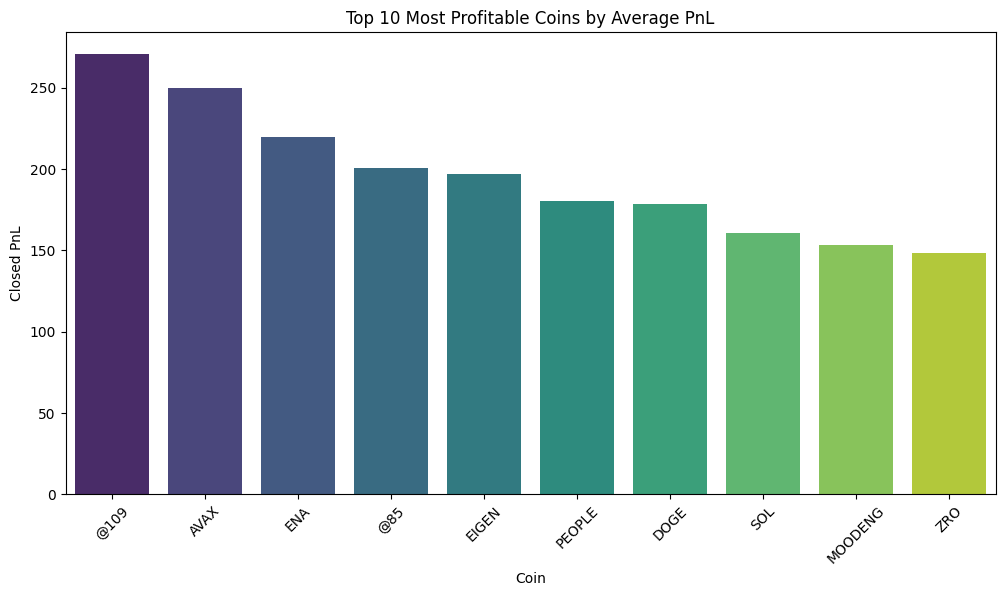

In [149]:
coin_stats = merged_df_clean.groupby('Coin').agg({
    'Closed PnL': 'mean',
    'is_profitable': 'mean',
    'Size USD': 'sum'
}).rename(columns={'is_profitable': 'win_rate'}).sort_values(by='Closed PnL', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=coin_stats.index[:10], y=coin_stats['Closed PnL'][:10], palette='viridis')
plt.title('Top 10 Most Profitable Coins by Average PnL')
plt.xticks(rotation=45)
plt.savefig('outputs/coin_profitability.png')
plt.show()

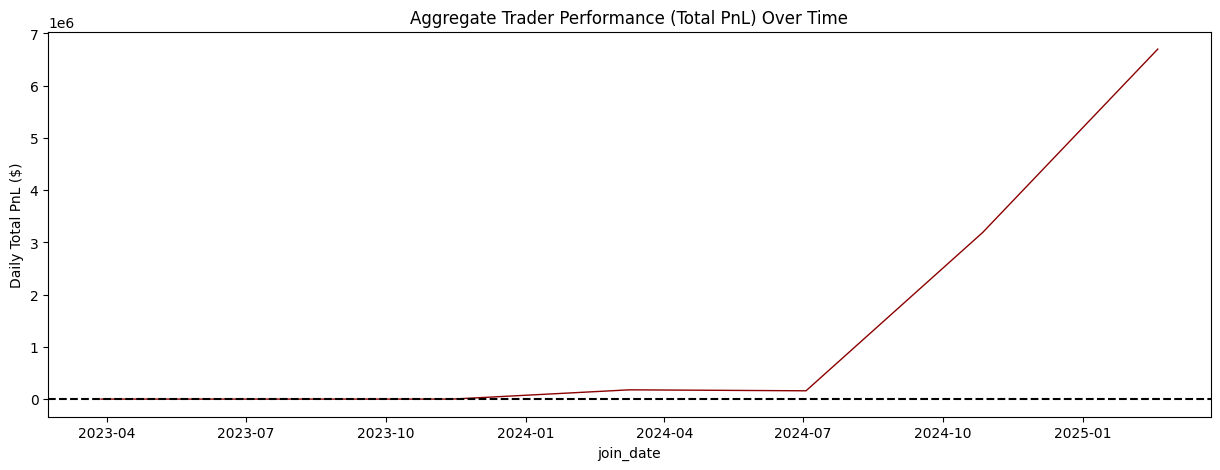

In [150]:
# Resample to Daily PnL to see the timeline of performance
daily_perf = merged_df_clean.groupby('join_date')['Closed PnL'].sum()

plt.figure(figsize=(15, 5))
daily_perf.plot(color='darkred', linewidth=1)
plt.axhline(0, color='black', linestyle='--')
plt.title('Aggregate Trader Performance (Total PnL) Over Time')
plt.ylabel('Daily Total PnL ($)')
plt.savefig('outputs/pnl_timeline.png')
plt.show()

Growth Inflection: PnL was stagnant for 18 months before a $6M+ parabolic breakout in late 2024.

Cycle Match: This spike perfectly aligns with the Greed/Extreme Greed regimes, confirming they are the primary wealth-generation phases.

Scale Shift: The market evolved from low-activity "flatness" to high-volatility "trending" in a matter of months.

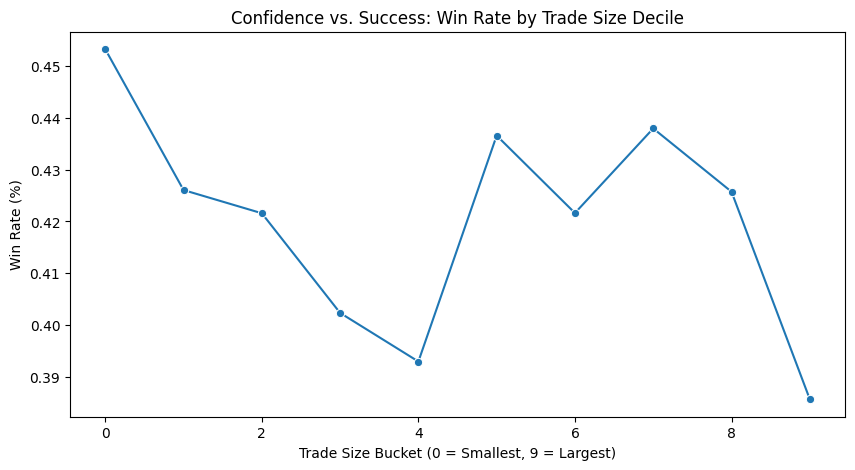

In [151]:
# Bin the Size USD into deciles (10 groups)
merged_df_clean['size_bin'] = pd.qcut(merged_df_clean['Size USD'], 10, labels=False)

# Calculate Win Rate for each size bucket
size_win_rate = merged_df_clean.groupby('size_bin')['is_profitable'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=size_win_rate.index, y=size_win_rate.values, marker='o')
plt.title('Confidence vs. Success: Win Rate by Trade Size Decile')
plt.xlabel('Trade Size Bucket (0 = Smallest, 9 = Largest)')
plt.ylabel('Win Rate (%)')
plt.savefig('outputs/size_vs_winrate.png')
plt.show()

Diminishing Accuracy: Win rate peaks at ~45% for the smallest trades and drops to ~38.5% for the largest, suggesting that increased capital "size" does not equal increased "skill."

Risk Paradox: Traders appear to be most accurate when their risk is lowest, potentially due to over-leveraging or "emotional sizing" in larger trades.

In [152]:
volume_sentiment = merged_df_clean.groupby('sentiment_bucket').agg({
    'Size USD': ['sum', 'mean'],
    'Account': 'nunique'
})

volume_sentiment.columns = ['total_volume', 'avg_trade_size', 'unique_traders']
volume_sentiment



/tmp/ipython-input-3621467662.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  volume_sentiment = merged_df_clean.groupby('sentiment_bucket').agg({


,total_volume,avg_trade_size,unique_traders
sentiment_bucket,,,
Extreme Fear,0.000000e+00,NaN,0
Fear,7.040614e+08,5259.645260,32
Neutral,2.184323e+07,3058.848110,8
Greed,1.155037e+08,3182.883845,29
Extreme Greed,3.940677e+07,5660.265764,5


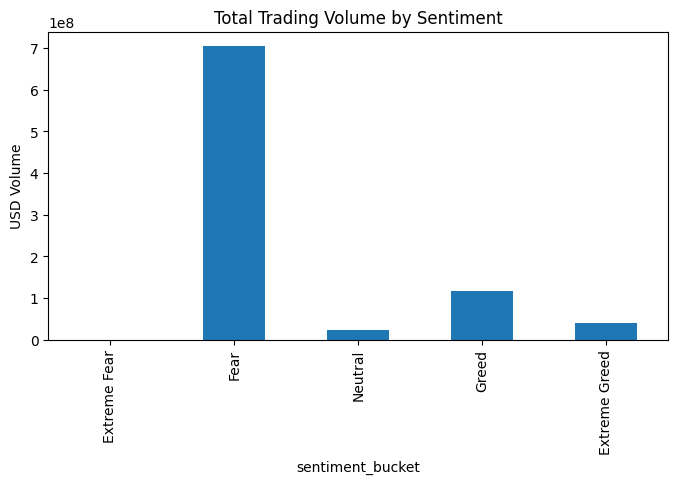

In [153]:
volume_sentiment['total_volume'].plot(kind='bar', figsize=(8,4), title='Total Trading Volume by Sentiment')
plt.ylabel('USD Volume')
plt.savefig('outputs/volume_by_sentiment.png')
plt.show()

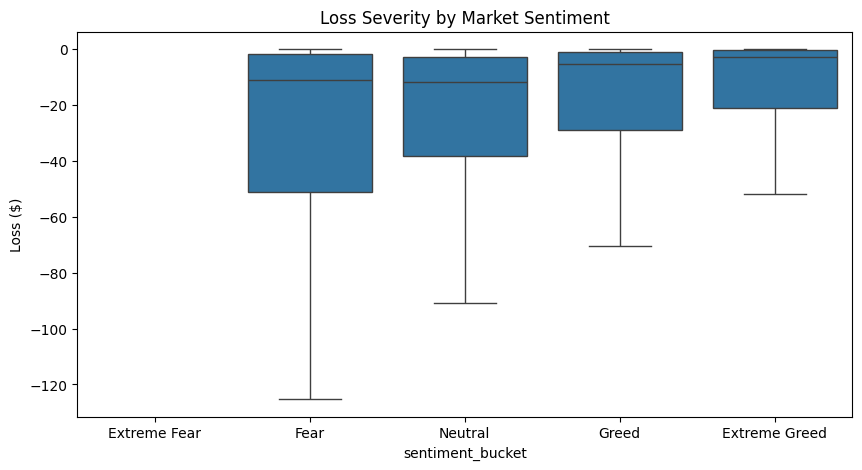

In [154]:
loss_df = merged_df_clean[merged_df_clean['Closed PnL'] < 0]

plt.figure(figsize=(10,5))
sns.boxplot(data=loss_df, x='sentiment_bucket', y='Closed PnL', showfliers=False)
plt.title('Loss Severity by Market Sentiment')
plt.ylabel('Loss ($)')
plt.savefig('outputs/loss_severity.png')
plt.show()


/tmp/ipython-input-1179775466.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transition_perf = merged_df_clean.groupby(


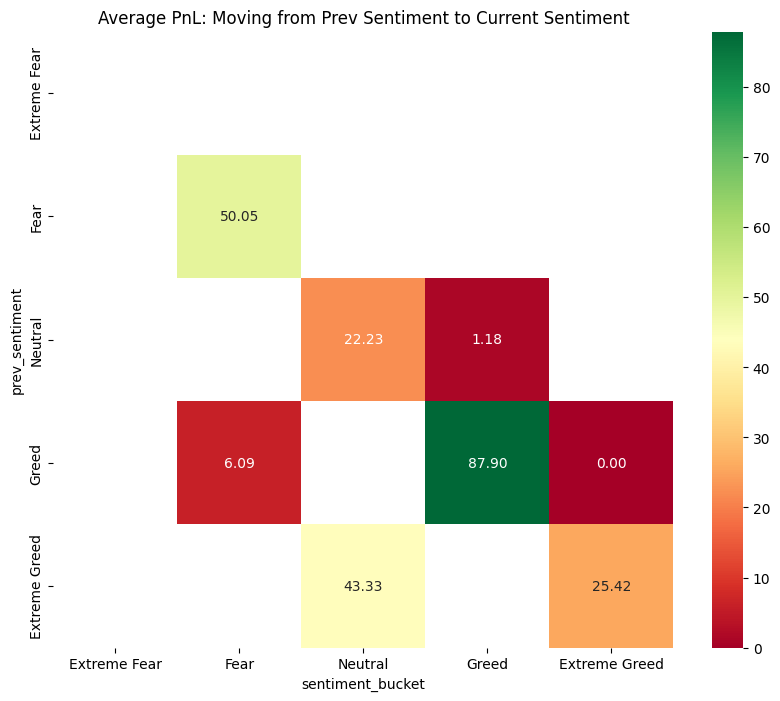

In [155]:
merged_df_clean = merged_df_clean.sort_values('join_date')

merged_df_clean['prev_sentiment'] = merged_df_clean['sentiment_bucket'].shift(1)

transition_perf = merged_df_clean.groupby(
    ['prev_sentiment', 'sentiment_bucket']
)['Closed PnL'].mean().unstack()

transition_perf
plt.figure(figsize=(10, 8))
sns.heatmap(transition_perf, annot=True, fmt=".2f", cmap='RdYlGn')
plt.title('Average PnL: Moving from Prev Sentiment to Current Sentiment')
plt.savefig('outputs/sentiment_transition_heatmap.png')
plt.show()

In [156]:
from scipy.stats import ttest_ind

fear_pnl = merged_df_clean[merged_df_clean['sentiment_bucket'] == 'Fear']['Closed PnL']
greed_pnl = merged_df_clean[merged_df_clean['sentiment_bucket'] == 'Greed']['Closed PnL']

ttest_ind(fear_pnl, greed_pnl, nan_policy='omit')

t_stat, p_val = ttest_ind(fear_pnl, greed_pnl, nan_policy='omit')
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")
if p_val < 0.05:
    print("Result: Statistically Significant - Sentiment DOES impact PnL.")
else:
    print("Result: Not Significant - Profit differences might be due to chance.")

T-statistic: -6.6251
P-value: 0.0000
Result: Statistically Significant - Sentiment DOES impact PnL.
